# 清理与分析数据-twitter cute dog
## 收集

In [1]:
# 导入需要的库
import pandas as pd
import numpy as np
import requests
import json
from fractions import Fraction
import math
import pandasql as ps
import matplotlib.pyplot as plt

In [2]:
# 收集文件 1 保存为 dataframe
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 收集文件 2 保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
with open(url.split('/')[-1],mode='wb') as file:
    response = requests.get(url)
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv',sep = '\t')

In [4]:
# 收集文件 3 保存为 dataframe
with open('tweet_json.txt',mode='r',encoding='utf-8') as file:
    content = file.readlines()
tmp_dict = {'id':[],'retweet_count':[],'favorite_count':[]}
for line in content:
    line_json = json.loads(line)
    tmp_dict['id'].append(line_json['id'])
    tmp_dict['retweet_count'].append(line_json['retweet_count'])
    tmp_dict['favorite_count'].append(line_json['favorite_count'])
tweet_json = pd.DataFrame(data=tmp_dict)

## 评估
### 目测评估

In [5]:
# 目测评估三个数据集

In [6]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [9]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等

In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_predictions) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [14]:
list(twitter_archive_enhanced)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [15]:
twitter_archive_enhanced[twitter_archive_enhanced['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [16]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [17]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [20]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11,10,Duke,None,None,None,None
354,831262627380748289,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,None,None,None,None
1530,690021994562220032,NaN,NaN,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Geoff (pronounced ""Kyle""). He acc...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690021994...,10,10,Geoff,None,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,None,None,None,None


In [21]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Daisy           7
an              7
Buddy           7
Toby            7
Dave            6
Bella           6
Jack            6
Scout           6
Oscar           6
Rusty           6
Stanley         6
Leo             6
Milo            6
Koda            6
Jax             6
Gus             5
             ... 
Aiden           1
Amélie          1
Karl            1
Adele           1
Bloo            1
Franq           1
Clyde           1
Lolo            1
Napolean        1
Spencer         1
Ito             1
Meera           1
Emanuel         1
Donny           1
Iroh            1
Jett            1
Chesterson      1
Spark           1
Jonah           1
Boots           1
DayZ            1
Cermet          1
Henry           1
Mairi           1
Travis    

In [24]:
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [25]:
tweet_json.retweet_count.value_counts()

1280     5
312      5
745      5
1554     4
1103     4
1201     4
37       4
61       4
606      4
680      4
701      4
182      4
6925     4
8471     4
468      4
252      3
1873     3
2690     3
71       3
118      3
1036     3
516      3
617      3
2142     3
280      3
263      3
521      3
1084     3
698      3
985      3
        ..
2482     1
4533     1
4535     1
441      1
2490     1
445      1
4479     1
377      1
325      1
2422     1
329      1
333      1
8527     1
6480     1
10580    1
345      1
347      1
2400     1
4449     1
705      1
6500     1
357      1
6504     1
361      1
6506     1
367      1
4465     1
2418     1
2420     1
0        1
Name: retweet_count, Length: 1752, dtype: int64

In [26]:
twitter_archive_enhanced[twitter_archive_enhanced.text.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
sum(tweet_json.retweet_count.isnull())

0

#### 质量
##### `twitter_archive_enhanced` 表格
- 一条推特中狗狗会含有多个身份的情况(tweet_id:770093767776997377,733109485275860992)(因为tweet中同时包含了对两只狗狗的评价)
- 狗狗身份判断错误(tweet_id:855851453814013952)(应该是 puppo)
- 狗狗身份判断错误(tweet_id:817777686764523521)(应该是 pupper)
- 狗狗身份判断错误(tweet_id:785639753186217984)(应该是 doggo)
- 狗狗身份判断错误(tweet_id:801115127852503040)(应该是 pupper)
- 狗狗身份判断错误(tweet_id:854010172552949760)(应该是 doggo)
- 狗狗身份判断错误(tweet_id:751583847268179968)(应该是 doggo)
- 分数提取不合理
- tweet_id:820690176645140481 12/10(分值有问题,手动修复)
- tweet_id:731156023742988288 12/10(分值有问题,手动修复)
- tweet_id:710658690886586372 10/10(分值有问题,手动修复)
- tweet_id:704054845121142784 12/10(分值有问题,手动修复)
- tweet_id:686035780142297088 2/10(分值有问题,手动修复)
- tweet_id:677716515794329600 12/10(分值有问题,手动修复)
- tweet_id:832088576586297345 删除(非狗狗评分的相关的tweet)
- tweet_id:810984652412424192 删除(非狗狗评分的相关的tweet)
- tweet_id:682808988178739200 删除(非狗狗评分的相关的tweet)
- 部分名字提取错误（出现了大量的a和None，可以用*named* *name is*关键字匹配）
- 狗狗名称用了缩写(Tyr->Tyrone)（tweetid:796865951799083009）
- 小写字母开头的狗狗名字都不对（such,an,very,a,just,not,one）
- 单个字母的狗狗名字也有问题（O,a）
- 错误的数据类型（ *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*浮点改为整型）
- 错误的数据类型（*timestamp*, *retweeted_status_timestamp* 字符串改为时间类型）


##### `image_predictions` 表格

##### `tweet_json` 表格
- 缺少记录（2352条而不是2356条）


#### 清洁度
- `tweet_json`的转发数和喜欢数是`twitter_archive_enhanced`表格的一部分
- `image_predictions`预测出的狗狗种类是`twitter_archive_enhanced`表格的一部分
- `twitter_archive_enhanced`表格代表狗狗地位的变量（doggo,floofer,pupper,puppo）应该合并到一列
- `twitter_archive_enhanced`表格text应该拆分为两个变量：tweet内容与tweet链接



## 清理

In [28]:
# 备份三个数据集
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### 清洁度

#### `tweet_json`的转发数和喜欢数是`twitter_archive_enhanced`表格的一部分

##### 定义
将 *转发数* 和 *喜欢数* 合并到`twitter_archive_enhanced`，按照 *tweet_id* 进行合并

##### 代码

In [29]:
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, tweet_json_clean,
                            left_on='tweet_id',right_on='id', how='left')
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('id', axis=1)
twitter_archive_enhanced_clean.retweet_count = twitter_archive_enhanced_clean.retweet_count.astype('Int64')
twitter_archive_enhanced_clean.favorite_count = twitter_archive_enhanced_clean.favorite_count.astype('Int64')

##### 测试

In [30]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

#### `image_predictions`预测出的狗狗种类是`twitter_archive_enhanced`表格的一部分

##### 定义
先选出可能性最大并且是狗狗的值，导入*预测的狗狗种类* 列，将该列合并到`twitter_archive_enhanced`，按照 *tweet_id* 进行合并

##### 代码

In [31]:
conditions = [
    image_predictions_clean['p1_dog'] == True, 
    image_predictions_clean['p2_dog'] == True,
    image_predictions_clean['p3_dog'] == True]
choices = [image_predictions_clean['p1'], image_predictions_clean['p2'], image_predictions_clean['p3']]
image_predictions_clean['dog_category'] = np.select(conditions, choices, default=np.nan)
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean
                                          , image_predictions_clean[['tweet_id','dog_category']]
                                          ,left_on='tweet_id',right_on='tweet_id', how='left')

##### 测试

In [32]:
twitter_archive_enhanced_clean.info()
twitter_archive_enhanced_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_category
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8842,39492,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6480,33786,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4301,25445,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8925,42863,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9721,41016,basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,3240,20548,Chesapeake_Bay_retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2142,12053,Appenzeller
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,19548,66596,Pomeranian
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4403,28187,Irish_terrier
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7684,32467,Pembroke


#### 表格`twitter_archive_enhanced`代表狗狗地位的变量（doggo,floofer,pupper,puppo）应该合并到一列

##### 定义
先筛选出4个地位都为空的twitter数据并保存，对twitter数据代表地位的4列进行合并，过滤保存的地位全部为空的数据进行拼接。

##### 代码

In [33]:
# 先筛选出4个地位都为空的twitter数据并保存
twitter_archive_enhanced_cut = twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.doggo == 'None') & (twitter_archive_enhanced_clean.floofer == 'None') & (twitter_archive_enhanced_clean.pupper == 'None') & (twitter_archive_enhanced_clean.puppo == 'None')]
twitter_archive_enhanced_cut = twitter_archive_enhanced_cut[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count','dog_category']]
twitter_archive_enhanced_cut['dog_status']= ['None'] * len(twitter_archive_enhanced_cut.index)

# 对twitter数据代表地位的4列进行合并
twitter_archive_enhanced_clean = pd.melt(twitter_archive_enhanced_clean,
                                         id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count','dog_category'],
                                         var_name='dog_status_name', value_name='dog_status')
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.dog_status != "None"]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('dog_status_name', axis=1)

# 拼接
twitter_archive_enhanced_clean = pd.concat([twitter_archive_enhanced_clean, twitter_archive_enhanced_cut],
                                           ignore_index=True)

##### 测试

In [34]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7684,32467,Pembroke,doggo
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,3099,20719,German_shepherd,doggo
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,5632,27918,Labrador_retriever,doggo
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,3608,20687,komondor,doggo
4,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,5729,21403,NaN,doggo
5,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,3300,16431,Chihuahua,doggo
6,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,3746,16242,golden_retriever,doggo
7,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,19118,47679,flat-coated_retriever,doggo
8,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,3419,17120,English_springer,doggo
9,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,10647,0,Staffordshire_bullterrier,doggo


In [35]:
twitter_archive_enhanced_clean.dog_status.value_counts()

None       1976
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_status, dtype: int64

#### `twitter_archive_enhanced`表格text应该拆分为两个变量：tweet内容与tweet链接

##### 定义
使用正则表达式和 pandas 的 `str.extract` 方法，从 *text* 一列提取变量*text* 和 *tweet_link* 。

##### 代码

In [36]:
twitter_archive_enhanced_clean['tweet_text'] = twitter_archive_enhanced_clean.text.str.replace('https://.*','')
twitter_archive_enhanced_clean['tweet_link'] = twitter_archive_enhanced_clean.text.str.extract('(https://.*)', expand=True)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={'text': 'ori_text'})
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={'tweet_text': 'text'})

##### 测试

In [37]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link


### 质量

#### 狗狗身份判断错误(tweet_id:855851453814013952)(应该是 puppo)
其他：
- 狗狗身份判断错误(tweet_id:817777686764523521)(应该是 pupper)
- 狗狗身份判断错误(tweet_id:785639753186217984)(应该是 doggo)
- 狗狗身份判断错误(tweet_id:801115127852503040)(应该是 pupper)
- 狗狗身份判断错误(tweet_id:854010172552949760)(应该是 doggo)
- 狗狗身份判断错误(tweet_id:751583847268179968)(应该是 doggo)

##### 定义
这6条twitter文字中同时包含了两种狗狗地位类型的关键词，导致狗狗身份判断错误。这里删除错误的类型，保留正确的类型。

##### 代码

In [38]:
twitter_archive_enhanced_clean.tweet_id.value_counts().head(20)

770093767776997377    2
733109485275860992    2
855851453814013952    2
741067306818797568    2
802265048156610565    2
808106460588765185    2
817777686764523521    2
785639753186217984    2
781308096455073793    2
801115127852503040    2
759793422261743616    2
775898661951791106    2
854010172552949760    2
751583847268179968    2
738891149612572673    1
685315239903100929    1
673686845050527744    1
749075273010798592    1
837012587749474308    1
842765311967449089    1
Name: tweet_id, dtype: int64

In [39]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 855851453814013952) & (twitter_archive_enhanced_clean.dog_status != 'puppo'))]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 817777686764523521) & (twitter_archive_enhanced_clean.dog_status != 'pupper'))]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 785639753186217984) & (twitter_archive_enhanced_clean.dog_status != 'doggo'))]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 801115127852503040) & (twitter_archive_enhanced_clean.dog_status != 'pupper'))]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 854010172552949760) & (twitter_archive_enhanced_clean.dog_status != 'doggo'))]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 751583847268179968) & (twitter_archive_enhanced_clean.dog_status != 'doggo'))]

##### 测试

In [40]:
twitter_archive_enhanced_clean.tweet_id.value_counts().head(20)

802265048156610565    2
741067306818797568    2
808106460588765185    2
733109485275860992    2
759793422261743616    2
770093767776997377    2
775898661951791106    2
781308096455073793    2
673686845050527744    1
738891149612572673    1
685315239903100929    1
842765311967449089    1
829861396166877184    1
749075273010798592    1
833722901757046785    1
837012587749474308    1
666051853826850816    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: tweet_id, dtype: int64

In [41]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id == 855851453814013952]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link
370,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,19118,47679,flat-coated_retriever,puppo,Here's a puppo participating in the #ScienceMa...,https://t.co/cMhq16isel


In [42]:
twitter_archive_enhanced_clean.dog_status.value_counts()

None       1976
pupper      255
doggo        94
puppo        30
floofer       9
Name: dog_status, dtype: int64

#### 分数提取不合理

##### 定义
先对对分值进行约分（图中有多只狗狗时，分母不为10）。根据x/10来进行正则匹配，修复提取错误的分数
##### 代码

In [43]:
pd.set_option('display.max_colwidth', -1)
tmp_df = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator != 10][['tweet_id','text','rating_numerator','rating_denominator']]
tmp_df['rating_numerator_new'] = tmp_df.text.str.extract('([0-9]+)/10', expand=True)
tmp_df['rating_denominator_new'] = tmp_df.text.str.extract('[0-9]+/(10)', expand=True)
for x in tmp_df.index:
    n = tmp_df.loc[x,'rating_numerator']
    d = tmp_df.loc[x,'rating_denominator']
    a = tmp_df.loc[x,'rating_numerator_new']
    b = tmp_df.loc[x,'rating_denominator_new']
    if not math.isnan(float(a)):
        tmp_df.loc[x,'rating_numerator'] = int(a)
        tmp_df.loc[x,'rating_denominator'] = int(b)
    elif d != 0:
        tmp_df.loc[x,'rating_numerator'] = int(Fraction(n, d).numerator)
        tmp_df.loc[x,'rating_denominator'] = int(Fraction(n, d).denominator)
    else:
        tmp_df.loc[x,'rating_numerator'] = n
        tmp_df.loc[x,'rating_denominator'] = d

tmp_df = tmp_df.drop('rating_numerator_new', axis=1)
tmp_df = tmp_df.drop('rating_denominator_new', axis=1)

for x in tmp_df.index:
    n = tmp_df.loc[x,'rating_numerator']
    d = tmp_df.loc[x,'rating_denominator']
    twitter_archive_enhanced_clean.loc[x,'rating_numerator'] = n
    twitter_archive_enhanced_clean.loc[x,'rating_denominator'] = d

##### 测试

In [44]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link
691,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,3,72,NaN,None,@docmisterio account started on 11/15/15,NaN
759,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",6,5,None,3699,13476,West_Highland_white_terrier,None,The floofs have been released I repeat the floofs have been released. 84/70,https://t.co/NIYC820tmd
822,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,1647,5904,golden_retriever,None,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1301,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,6,5,this,1427,4172,NaN,None,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once,https://t.co/yGQI3He3xv
1414,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,1,1,None,633,2513,soft-coated_wheaten_terrier,None,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80,https://t.co/0eb7R1Om12
1499,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,6,5,a,1023,3193,Great_Pyrenees,None,Here is a whole flock of puppers. 60/50 I'll take the lot,https://t.co/9dpcw6MdWa
1698,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,1,5,None,138,1271,NaN,None,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN
1744,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is sim

#### tweet_id:820690176645140481 12/10(分值有问题,手动修复)
- tweet_id:731156023742988288 12/10(分值有问题,手动修复)
- tweet_id:710658690886586372 10/10(分值有问题,手动修复)
- tweet_id:704054845121142784 12/10(分值有问题,手动修复)
- tweet_id:686035780142297088 2/10(分值有问题,手动修复)
- tweet_id:677716515794329600 12/10(分值有问题,手动修复)

##### 定义
更新对应tweet_id的分值

##### 代码

In [45]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 820690176645140481,['rating_numerator']] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 820690176645140481,['rating_denominator']] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 731156023742988288,['rating_numerator']] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 731156023742988288,['rating_denominator']] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 710658690886586372,['rating_numerator']] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 710658690886586372,['rating_denominator']] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 704054845121142784,['rating_numerator']] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 704054845121142784,['rating_denominator']] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 686035780142297088,['rating_numerator']] = 2
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 686035780142297088,['rating_denominator']] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 677716515794329600,['rating_numerator']] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 677716515794329600,['rating_denominator']] = 10

##### 测试

In [46]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link
691,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,3,72,NaN,None,@docmisterio account started on 11/15/15,NaN
822,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,1647,5904,golden_retriever,None,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n,https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1744,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,5,4,None,209,1941,NaN,None,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN


#### tweet_id:832088576586297345 删除(非狗狗评分的相关的tweet)
- tweet_id:810984652412424192 删除(非狗狗评分的相关的tweet)
- tweet_id:682808988178739200 删除(非狗狗评分的相关的tweet)

##### 定义
删除对应的tweet

##### 代码

In [47]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 832088576586297345) )]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 810984652412424192) )]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean.tweet_id == 682808988178739200) )]

##### 测试

In [48]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link


In [49]:
print(twitter_archive_enhanced_clean.rating_denominator.value_counts())
print(twitter_archive_enhanced_clean.rating_numerator.value_counts())

10    2361
Name: rating_denominator, dtype: int64
12      569
11      471
10      463
13      353
9       158
8       102
14      56 
7       54 
5       37 
6       32 
3       19 
4       15 
2       10 
1       8  
75      2  
0       2  
420     2  
15      2  
26      1  
182     1  
27      1  
1776    1  
17      1  
666     1  
Name: rating_numerator, dtype: int64


#### 部分名字提取错误（出现了大量的a和None，可以用*named* ,*name is*关键字匹配）

##### 定义
正则匹配*named* ,*name is*关键字后的内容，替换a或者None

##### 代码

In [50]:
tmp_df = twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean.name == 'None') | (twitter_archive_enhanced_clean.name == 'a')][['name','tweet_link','text']]
tmp_df['name1'] = tmp_df.text.str.extract('named ([a-zA-Z]+)',expand=True)
tmp_df['name2'] = tmp_df.text.str.extract('name is ([a-zA-Z]+)',expand=True)
for x in tmp_df[tmp_df.name1.notnull()].index:
    twitter_archive_enhanced_clean.loc[x,'name'] = tmp_df.loc[x,'name1']
for x in tmp_df[tmp_df.name2.notnull()].index:
    twitter_archive_enhanced_clean.loc[x,'name'] = tmp_df.loc[x,'name2']

##### 测试

In [51]:
twitter_archive_enhanced_clean.name.value_counts()

None          738
a             35 
Charlie       12 
Lucy          11 
Oliver        11 
Cooper        11 
Penny         10 
Tucker        10 
Lola          10 
Bo            9  
Winston       9  
the           8  
Sadie         8  
Daisy         7  
Buddy         7  
Bailey        7  
an            7  
Toby          7  
Scout         6  
Bella         6  
Dave          6  
Oscar         6  
just          6  
Koda          6  
Milo          6  
Leo           6  
Jack          6  
Jax           6  
Stanley       6  
Rusty         6  
             ..  
Karl          1  
Adele         1  
Klint         1  
Bloo          1  
Suki          1  
Batdog        1  
Ito           1  
Clyde         1  
Meera         1  
Emanuel       1  
Donny         1  
Cherokee      1  
Iroh          1  
Jett          1  
Chesterson    1  
Spark         1  
Napolean      1  
Jonah         1  
Cora          1  
DayZ          1  
Cermet        1  
Henry         1  
Jimbo         1  
Travis        1  
Gerbald   

#### 狗狗名称用了缩写(Tyr->Tyrone)（tweetid:796865951799083009）

##### 定义
更新对应tweet_id的name字段

##### 代码

In [52]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 796865951799083009,['name']] =  'Tyrone'

##### 测试

In [53]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id == 796865951799083009,['name']]

,name
899,Tyrone


#### 错误的数据类型（ *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*浮点改为整型）（*timestamp*, *retweeted_status_timestamp* 字符串改为时间类型）

##### 定义
将 *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id* 转化为整数类型
将 *timestamp*, *retweeted_status_timestamp* 转化为整数类型

##### 代码

In [54]:
twitter_archive_enhanced_clean.in_reply_to_status_id = twitter_archive_enhanced_clean.in_reply_to_status_id.astype('Int64')
twitter_archive_enhanced_clean.in_reply_to_user_id = twitter_archive_enhanced_clean.in_reply_to_user_id.astype('Int64')
twitter_archive_enhanced_clean.retweeted_status_id = twitter_archive_enhanced_clean.retweeted_status_id.astype('Int64')
twitter_archive_enhanced_clean.retweeted_status_user_id = twitter_archive_enhanced_clean.retweeted_status_user_id.astype('Int64')

twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)
twitter_archive_enhanced_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_enhanced_clean.retweeted_status_timestamp)

##### 测试

In [55]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2361 entries, 0 to 2369
Data columns (total 19 columns):
tweet_id                      2361 non-null int64
in_reply_to_status_id         77 non-null Int64
in_reply_to_user_id           77 non-null Int64
timestamp                     2361 non-null datetime64[ns, UTC]
source                        2361 non-null object
ori_text                      2361 non-null object
retweeted_status_id           183 non-null Int64
retweeted_status_user_id      183 non-null Int64
retweeted_status_timestamp    183 non-null datetime64[ns, UTC]
expanded_urls                 2304 non-null object
rating_numerator              2361 non-null int64
rating_denominator            2361 non-null int64
name                          2361 non-null object
retweet_count                 2357 non-null object
favorite_count                2357 non-null object
dog_category                  1757 non-null object
dog_status                    2361 non-null object
text          

In [56]:
twitter_archive_enhanced_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,7684,32467,Pembroke,doggo,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://t.co/t1bfwz5S2A
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,3099,20719,German_shepherd,doggo,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo,https://t.co/YSI00BzTBZ
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12,10,None,5632,27918,Labrador_retriever,doggo,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo,https://t.co/EMYIdoblMR
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12,10,Napolean,3608,20687,komondor,doggo,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo,https://t.co/PR7B7w1rUw
4,871102520638267392,NaN,NaN,2017-06-03 20:33:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaT,https://twitter.com/animalcog/status/871075758080503809,14,10,None,5729,21403,NaN,doggo,Never doubt a doggo 14/10,https://t.co/AbBLh2FZCH
5,869596645499047938,NaN,NaN,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12,10,Scout,3300,16431,Chihuahua,doggo,This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for,https://t.co/DsA2hwXAJo
6,858843525470990336,NaN,NaN,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 

### 存储清理后的主数据集

In [57]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv', sep=',', encoding='utf-8')

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


In [58]:
# 分析或可视化代码
q1 = """
SELECT count(distinct dog_category)
FROM twitter_archive_enhanced_clean
"""
ps.sqldf(q1, locals())

,count(distinct dog_category)
0,113


推特up主所有上传狗狗种类113种

In [59]:
# 分析或可视化代码
q1 = """
SELECT dog_category,
    count(1) as tweet_count
FROM twitter_archive_enhanced_clean
where dog_category != 'None'
group by dog_category
order by tweet_count desc
limit 10
"""
tweet_count_tmp10_df = ps.sqldf(q1, locals())

推特up主发推最多狗狗种类top10,看来up主特别钟情于`golden_retriever`

In [60]:
# 分析或可视化代码
q1 = """
SELECT dog_category,
    count(1) as tweet_count,
    sum(retweet_count)/count(1) as retweet_count_per_tweet
FROM twitter_archive_enhanced_clean
where dog_category != 'None'
group by dog_category
order by retweet_count_per_tweet desc
limit 10
"""
retweet_count_per_tweet_tmp10_df = ps.sqldf(q1, locals())

平均转发量最高的狗狗种类top10，看来`standard_poodle`有成为热门的潜力

In [61]:
# 分析或可视化代码
q1 = """
SELECT dog_category,
    count(1) as tweet_count,
    sum(favorite_count)/count(1) as favorite_count_per_tweet
FROM twitter_archive_enhanced_clean
where dog_category != 'None'
group by dog_category
order by favorite_count_per_tweet desc
limit 10
"""
favorite_count_per_tweet_tmp10_df = ps.sqldf(q1, locals())

网友最爱的狗狗种类top10，您能get到`Saluki`的魅力吗

In [62]:
# 分析或可视化代码
q1 = """
SELECT dog_category,
    count(1) as tweet_count,
    sum(rating_numerator)/count(1) as rating_numerator_per_tweet
FROM twitter_archive_enhanced_clean
where dog_category != 'None'
group by dog_category
order by rating_numerator_per_tweet desc
limit 10
"""
rating_numerator_per_tweet_tmp10_df = ps.sqldf(q1, locals())

获得平均得分最高的狗狗种类top10，`clumber`独领风骚

In [63]:
# 分析或可视化代码
q1 = """
SELECT *
FROM twitter_archive_enhanced_clean
order by favorite_count desc
limit 3
"""
ps.sqldf(q1, locals())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,ori_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_category,dog_status,text,tweet_link
0,822872901745569793,None,None,2017-01-21 18:26:02.000000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,None,None,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,None,47958,132318,Lakeland_terrier,puppo,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10,https://t.co/nTz3FtorBc
1,744234799360020481,None,None,2016-06-18 18:26:18.000000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,None,None,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,None,79116,130533,Labrador_retriever,doggo,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),https://t.co/7wE9LTEXC4
2,879415818425184262,None,None,2017-06-26 19:07:24.000000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,None,None,None,https://twitter.com/dog_rates/status/879415818425184262/video/1,13,10,Duddles,45655,107834,English_springer,None,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici),https://t.co/UDT7ZkcTgY


历史最受欢迎的推特top3。第一名:内容是puppo狗狗参与多伦多活动#WomensMarch，赞！

### 可视化

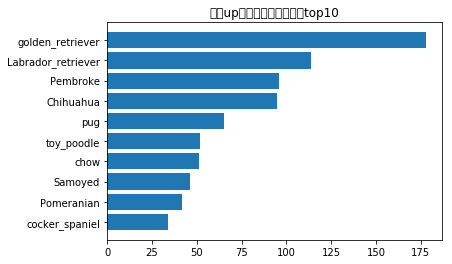

In [64]:
plt.barh(tweet_count_tmp10_df.dog_category, tweet_count_tmp10_df.tweet_count)
plt.title('推特up主发推最多狗狗种类top10')
plt.gca().invert_yaxis()

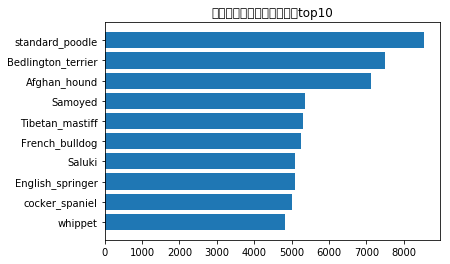

In [65]:
plt.barh(retweet_count_per_tweet_tmp10_df.dog_category, retweet_count_per_tweet_tmp10_df.retweet_count_per_tweet)
plt.title('平均转发量最高的狗狗种类top10')
plt.gca().invert_yaxis()

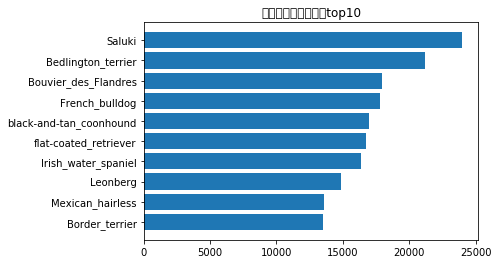

In [66]:
plt.barh(favorite_count_per_tweet_tmp10_df.dog_category, favorite_count_per_tweet_tmp10_df.favorite_count_per_tweet)
plt.title('网友最爱的狗狗种类top10')
plt.gca().invert_yaxis()

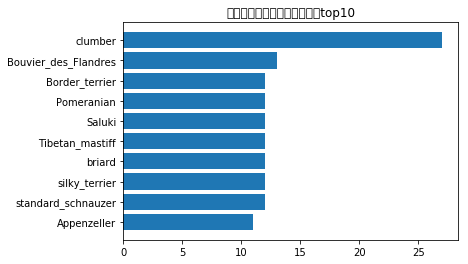

In [67]:
plt.barh(rating_numerator_per_tweet_tmp10_df.dog_category, rating_numerator_per_tweet_tmp10_df.rating_numerator_per_tweet)
plt.title('获得平均得分最高的狗狗种类top10')
plt.gca().invert_yaxis()

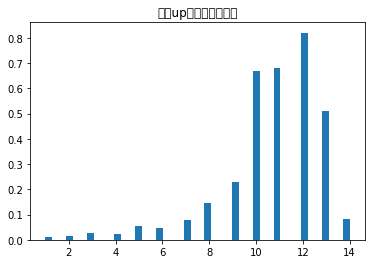

In [68]:
# 分析或可视化代码
q1 = """
select rating_numerator
from twitter_archive_enhanced_clean
where rating_numerator in(
    select rating_numerator
    from(
        SELECT rating_numerator,count(1) as rate_count
        FROM twitter_archive_enhanced_clean
        group by rating_numerator
        having rate_count >= 3
    )t1
)
"""
tmp_df = ps.sqldf(q1, locals())

plt.hist(tmp_df.rating_numerator, bins='auto', density=1)
plt.title('推特up主打分分布占比')
plt.show()

推特up主历史打分范围，成正态分布，主要其中在12分附近

### 参考链接：
> https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.barh.html   
https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html   
https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/   
https://stackoverflow.com/questions/48641632/extracting-specific-columns-from-pandas-dataframe/48641912   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html   
https://stackoverflow.com/questions/45865608/executing-an-sql-query-over-a-pandas-dataset/45866311